
# Tarea 8: practica Pythorch Lightning

1. Abre el enlace correspondiente al tutorial sobre introducci√≥n a Pytorch alojado en la p√°gina  de  Pythorch Lightning: 
https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/01-introduction-to-pytorch.html


2. Lee el tutorial y pon en pr√°ctica cada uno de los pasos expuestos en este.

3. Haz un cuaderno con la implementaci√≥n del c√≥digo junto con la explicaci√≥n expuesta en dicho tutorial.

In [4]:
import time

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm  # Progress bar

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export

In [3]:
print("Using torch", torch.__version__)

Using torch 1.12.1


Pythorch permite configurar la semilla para que los experimentos sean reproducibles, por ejemplo al generar n√∫meros aleatorios


In [4]:
torch.manual_seed(42)  # Setting the seed

#### Inicializar tensores

Se inicializa el tensor pasando el shape deseado

In [5]:
x = Tensor(2, 3, 4)
print(x)

tensor([[[1.0337e-24, 7.3568e-43, 1.0337e-24, 7.3568e-43],
         [1.0337e-24, 7.3568e-43, 1.0337e-24, 7.3568e-43],
         [1.0337e-24, 7.3568e-43, 1.0336e-24, 7.3568e-43]],

        [[1.0336e-24, 7.3568e-43, 1.0336e-24, 7.3568e-43],
         [1.0336e-24, 7.3568e-43, 1.0336e-24, 7.3568e-43],
         [1.0336e-24, 7.3568e-43, 1.0335e-24, 7.3568e-43]]])


In [6]:
# Create a tensor from a (nested) list
x = Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [7]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


Se puede obtener la forma del tensor igual que en numpy ('x.shape'), o utilizando el m√©todo '.size':

In [8]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


Los tensores se pueden convertir a Numpy arrays y veceversa. PAra convertir de Numpy a Tensor:

In [9]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


Para convertir de Tensor a Numpy

In [10]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


#### Operaciones

Operaciones con tensores en Pytorch

In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


'x1 + x2' crea un nuevo tensor. Es posible utilizar el m√©todo 'add_' para realizar la suma directamente en uno de los dos tensores:

In [12]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


Cambiar la forma del tensor utilizando el m√©todo 'view':

In [13]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [14]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [15]:
x = x.permute(1, 0)  # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Operaciones con matrices:

In [16]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [17]:
W = torch.arange(9).view(3, 3)  # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [18]:
h = torch.matmul(x, W)  # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Indexaci√≥n

Acceder a dator del tensor a trav√©s de sus indices:

In [19]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [20]:
print(x[:, 1])  # Second column

tensor([1, 5, 9])


In [21]:
print(x[0])  # First row

tensor([0, 1, 2, 3])


In [22]:
print(x[:2, -1])  # First two rows, last column

tensor([3, 7])


In [23]:
print(x[1:3, :])  # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Pytorch permite obtener el gradiente de un Tensor. Al crear un tensor, normalmente no requiere gradiente:

In [25]:
x = torch.ones((3,))
print(x.requires_grad)

False


El m√©todo `requires_grad_()` se usa para indicar que s√≠ requiere gradiente.
Tambi√©n podemos usar el siguiente par√°metro al crear un Tensor 
`requires_grad=True` para indicar que requiere gradiente.

In [26]:
x.requires_grad_(True)
print(x.requires_grad)

True


Se crea la siguiente funci√≥n:

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

Suponemos que $x$ son los par√°metros de entrada y queremos optimizar la salida $y$.
Para esto, queremos obtener los gradientes $\partial y / \partial \mathbf{x}$.
Para el ejemplo utilizamos $\mathbf{x}=[0,1,2]$ como entrada.

In [27]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)  # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Ahora se crea el grafo computacional:

In [ ]:
a = x + 2
b = a**2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [29]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [31]:
print(x.grad)

None


### soporte para GPU

Utilizar la GPU permite optimizar las operaciones realizando muchas peque√±as opeaciones en paralelo


In [5]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


Si se tiene disponible una GPU se pueden convertir los tensores para ser trabajdos en GPU. De lo contrario de trabajan en CPU. Por defecto se trabajan en CPU, pero se puede especificar de la siguiente forma:

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


Se crea un Tensor y se asigna el device:

In [34]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]])


En caso de tener disponible GPU, se ver√° el atributo `device='cuda:0'` impreso al final del tensor.

El siguiente ejemplo compara el tiempo de procesamiento entre CPU y GPU, pero no tenego disponible una GPU

In [35]:
x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
if torch.cuda.is_available():
    x = x.to(device)
    # CUDA is asynchronous, so we need to use different timing functions
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 127.21043s


In [36]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Learning by example: Continuous XOR
<div class="center-wrapper"><div class="video-wrapper"><iframe src="https://www.youtube.com/embed/schbjeU5X2g" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div></div>

Si queremos construir una red neuronal en PyTorch, podemos especificar todos nuestros par√°metros (matrices de peso, vectores de sesgo) usando tensores (con require_grad=True), pedirle a PyTorch que calcule los gradientes y luego ajuste los par√°metros. Pero las cosas pueden volverse engorrosas r√°pidamente si tenemos muchos par√°metros. En PyTorch, hay un paquete llamado torch.nn que hace que la construcci√≥n de redes neuronales sea m√°s conveniente. Presentaremos las bibliotecas y todas las partes adicionales que pueda necesitar para entrenar una red neuronal en PyTorch, usando un clasificador de ejemplo simple en un ejemplo simple pero bien conocido: XOR. Dadas dos entradas binarias ùë•1 y ùë•2 , la etiqueta para predecir es 1 si ùë•1 o ùë•2 es 1 mientras que el otro es 0 , o la etiqueta es 0 en todos los dem√°s casos. El ejemplo se hizo famoso por el hecho de que una sola neurona, es decir, un clasificador lineal, no puede aprender esta funci√≥n simple. Por lo tanto, aprenderemos c√≥mo construir una peque√±a red neuronal que pueda aprender esta funci√≥n. Para hacerlo un poco m√°s interesante, movemos el XOR al espacio continuo e introducimos algo de ruido gaussiano en las entradas binarias. Nuestra separaci√≥n deseada de un conjunto de datos XOR podr√≠a verse de la siguiente manera


<center style="width: 100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/continuous_xor.svg" width="350px"></center>

### El modelo

El paquete `torch.nn` define una serie de clases muy √∫tiles como capas de redes lineales, funciones de activaci√≥n, funciones de p√©rdida, etc.

In [7]:
import torch.nn as nn

#### nn.Module

Este modulo incluye otros m√≥dulos.
La siguiente, es la plantilla b√°sica de un m√≥dulo:

In [8]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass


#### Clasificador simple

Ahora podemos hacer uso de los m√≥dulos predefinidos en el paquete `torch.nn` y definir nuestra propia red neuronal peque√±a. Usaremos una red m√≠nima con una capa de entrada, una capa oculta con tanh como funci√≥n de activaci√≥n y una capa de salida. En otras palabras, nuestras redes deber√≠an verse as√≠:

<center width="100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/small_neural_network.svg" width="300px"></center>

Las neuronas de entrada se muestran en azul y representan las coordenadas $x_1$ y $x_2$ de un punto de datos.
Las neuronas ocultas que incluyen una activaci√≥n de tanh se muestran en blanco y la neurona de salida en rojo.
En PyTorch, podemos definir esto de la siguiente manera:

In [9]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

Para los ejemplos de este cuaderno, usaremos una peque√±a red neuronal con dos neuronas de entrada y cuatro neuronas ocultas.
A medida que realizamos la clasificaci√≥n binaria, utilizaremos una sola neurona de salida.
Tenga en cuenta que todav√≠a no aplicamos un sigmoide en la salida.
Esto se debe a que otras funciones, especialmente la p√©rdida, son m√°s eficientes y precisas para calcular las salidas originales en lugar de la salida sigmoidea.
Discutiremos la raz√≥n detallada m√°s adelante.

In [10]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


Imprimir el modelo enumera todos los subm√≥dulos que contiene.
Los par√°metros de un m√≥dulo se pueden obtener usando sus funciones `parameters()`, o `named_parameters()` para obtener un nombre para cada objeto de par√°metro.
Para nuestra peque√±a red neuronal, tenemos los siguientes par√°metros:

In [11]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`.
The tanh activation function does not have any parameters.
Note that parameters are only registered for `nn.Module` objects that are direct object attributes, i.e. `self.a = ...`.
If you define a list of modules, the parameters of those are not registered for the outer module and can cause some issues when you try to optimize your module.
There are alternatives, like `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential`, that allow you to have different data structures of modules.
We will use them in a few later tutorials and explain them there.

### La data

PyTorch tambi√©n provee funcionalidades para cargar data de entrenamiento y test de forma eficiente.`torch.utils.data`.

In [12]:
import torch.utils.data as data

Este paquete define 2 clases: `data.Dataset` y `data.DataLoader`.
El dataset proveee una interfaz para acceder a la data de training/test, el data loader prepara la data en batches para ser manejados durante el entrenamiento

In [13]:


class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        """XORDataset.

        Args:
            size: Number of data points we want to generate
            std: Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Se crea el dataset para inspeccionarlo:

In [14]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([-0.1534,  0.0049]), tensor(0))


In [15]:
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

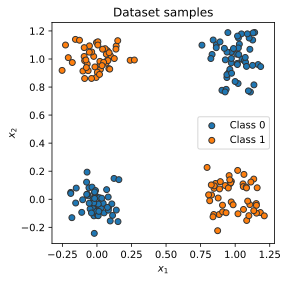

In [47]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### La clase Data Loader

La clase `torch.utils.data.DataLoader` representa un Python iterable sobre un conjunto de datos con soporte para procesamiento por lotes autom√°tico, carga de datos multiproceso y muchas m√°s funciones.
El cargador de datos se comunica con el conjunto de datos mediante la funci√≥n `__getitem__` y apila sus resultados como tensores sobre la primera dimensi√≥n para formar un lote.
A diferencia de la clase de conjunto de datos, normalmente no tenemos que definir nuestra propia clase de cargador de datos, sino que podemos crear un objeto con el conjunto de datos como entrada.
Adem√°s, podemos configurar nuestro cargador de datos con los siguientes argumentos de entrada :

* `batch_size`: n√∫mero de muestras a apilar por lote
* `shuffle`: si es verdadero, los datos se devuelven en orden aleatorio.
Esto es importante durante el entrenamiento para introducir la estocasticidad.
* `num_workers`: N√∫mero de subprocesos a utilizar para la carga de datos.
El valor predeterminado, 0, significa que los datos se cargar√°n en el proceso principal, lo que puede ralentizar el entrenamiento de conjuntos de datos en los que la carga de un punto de datos lleva una cantidad de tiempo considerable (por ejemplo, im√°genes grandes).
Se recomiendan m√°s trabajadores para esos, pero pueden causar problemas en las computadoras con Windows.
Para conjuntos de datos peque√±os como el nuestro, 0 trabajadores suelen ser m√°s r√°pidos.
* `pin_memory`: si es verdadero, el cargador de datos copiar√° los tensores en la memoria anclada de CUDA antes de devolverlos.
Esto puede ahorrar algo de tiempo para grandes puntos de datos en las GPU.
Por lo general, es una buena pr√°ctica usarla para un conjunto de entrenamiento, pero no necesariamente para la validaci√≥n y prueba para ahorrar memoria en la GPU.
* `drop_last`: si es verdadero, el √∫ltimo lote se elimina en caso de que sea m√°s peque√±o que el tama√±o de lote especificado.
Esto ocurre cuando el tama√±o del conjunto de datos no es un m√∫ltiplo del tama√±o del lote.
Solo potencialmente √∫til durante el entrenamiento para mantener un tama√±o de lote constante.

Vamos a crear un cargador de datos simple a continuaci√≥n:

In [16]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [17]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0782,  1.0701],
        [ 1.0293,  0.8674],
        [ 0.9139,  0.0374],
        [-0.0521,  0.0157],
        [ 1.2107, -0.1912],
        [-0.1701,  1.0550],
        [-0.1417,  1.0349],
        [ 0.9326,  1.0584]])
Data labels torch.Size([8]) 
 tensor([1, 0, 1, 0, 1, 1, 1, 0])


### Optimizaci√≥n

Despu√©s de definir el modelo y el conjunto de datos, es hora de preparar la optimizaci√≥n del modelo.
Durante el entrenamiento, realizaremos los siguientes pasos:

1. Obtenga un lote del cargador de datos
2. Obtenga las predicciones del modelo para el lote
3. Calcule la p√©rdida en funci√≥n de la diferencia entre predicciones y etiquetas
4. Backpropagation: calcula los gradientes de cada par√°metro con respecto a la p√©rdida
5. Actualice los par√°metros del modelo en la direcci√≥n de los gradientes

Hemos visto c√≥mo podemos hacer los pasos 1, 2 y 4 en PyTorch. Ahora, veremos los pasos 3 y 5.

#### M√≥dulos de p√©rdida

Podemos calcular la p√©rdida de un lote simplemente realizando algunas operaciones de tensor, ya que se agregan autom√°ticamente al gr√°fico de c√°lculo.
Por ejemplo, para la clasificaci√≥n binaria, podemos usar Binary Cross Entropy (BCE), que se define de la siguiente manera:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

donde $y$ son nuestras etiquetas y $x$ nuestras predicciones, ambas en el rango de $[0,1]$.
Sin embargo, PyTorch ya proporciona una lista de funciones de p√©rdida predefinidas que podemos usar (consulte [aqu√≠](https://pytorch.org/docs/stable/nn.html#loss-functions) para obtener una lista completa).
Por ejemplo, para BCE, PyTorch tiene dos m√≥dulos: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`.
Mientras que `nn.BCELoss` espera que las entradas $x$ est√©n en el rango $[0,1]$, es decir, la salida de un sigmoide, `nn.BCEWithLogitsLoss` combina una capa sigmoide y la p√©rdida BCE en una sola clase.
Esta versi√≥n es num√©ricamente m√°s estable que usar un sigmoide simple seguido de una p√©rdida BCE debido a los logaritmos aplicados en la funci√≥n de p√©rdida.
Por lo tanto, se recomienda utilizar funciones de p√©rdida aplicadas en "logits" siempre que sea posible (¬°recuerde no aplicar un sigmoide en la salida del modelo en este caso!).
Para nuestro modelo definido anteriormente, usamos el m√≥dulo `nn.BCEWithLogitsLoss`.

In [18]:
loss_module = nn.BCEWithLogitsLoss()

#### Descenso de gradiente estoc√°stico

Para actualizar los par√°metros, PyTorch proporciona el paquete `torch.optim` que tiene implementados los optimizadores m√°s populares.
Discutiremos los optimizadores espec√≠ficos y sus diferencias m√°s adelante en el curso, pero por ahora usaremos el m√°s simple de ellos: `torch.optim.SGD`.
Stochastic Gradient Descent actualiza los par√°metros multiplicando los gradientes con una peque√±a constante, llamada tasa de aprendizaje, y rest√°ndolos de los par√°metros (por lo tanto, minimizando la p√©rdida).
Por lo tanto, nos movemos lentamente hacia la direcci√≥n de minimizar la p√©rdida.
Un buen valor predeterminado de la tasa de aprendizaje para una red peque√±a como la nuestra es 0,1.

In [19]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Training

Entrenamiento del m√≥delo
Como primer paso, creamos un conjunto de datos un poco m√°s grande y especificamos un data loader con un tama√±o de batch m√°s grande.

In [20]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

Se crea una funci√≥n para el entrenamiento.

Los 5 pasos son: cargar un batch, obtener predicciones, calcular la perdida, backpropagate y actualizar.

Se carga en GPU si est√° disponible:

In [21]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

Adem√°s, configuramos nuestro modelo en modo de entrenamiento.
Esto se hace llamando a `model.train()`.
Existen ciertos m√≥dulos que necesitan realizar un reenv√≠o diferente
paso durante el entrenamiento que durante la prueba (por ejemplo, BatchNorm y Dropout),
y podemos cambiar entre ellos usando `model.train()` y `model.eval()`.

In [22]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            # Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]

            # Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            # Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            # Step 5: Update the parameters
            optimizer.step()

In [23]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

#### Guardar el modelo

Despu√©s de terminar de entrenar un modelo, guardamos el modelo en el disco para que podamos cargar los mismos pesos en un momento posterior.
Para esto, extraemos el llamado `state_dict` del modelo que contiene todos los par√°metros que se pueden aprender.
Para nuestro modelo simple, el dict de estado contiene las siguientes entradas:

In [25]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 1.8116, -1.3464],
        [-0.7308, -1.5574],
        [-2.4316, -2.0278],
        [ 0.2635,  0.5779]])), ('linear1.bias', tensor([0.9666, 1.5716, 0.7613, 0.8400])), ('linear2.weight', tensor([[-1.9564,  2.1000, -2.7764, -0.3966]])), ('linear2.bias', tensor([-0.4786]))])


Para guardar el estado del diccionario `torch.save`:

In [26]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

Para cargar un modelo desde un dictado de estado, usamos la funci√≥n `torch.load` para
cargue el dictado de estado desde el disco y la funci√≥n del m√≥dulo
`load_state_dict` para sobrescribir nuestros par√°metros con los nuevos valores:

In [27]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 1.8116, -1.3464],
        [-0.7308, -1.5574],
        [-2.4316, -2.0278],
        [ 0.2635,  0.5779]])), ('linear1.bias', tensor([0.9666, 1.5716, 0.7613, 0.8400])), ('linear2.weight', tensor([[-1.9564,  2.1000, -2.7764, -0.3966]])), ('linear2.bias', tensor([-0.4786]))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 1.8116, -1.3464],
        [-0.7308, -1.5574],
        [-2.4316, -2.0278],
        [ 0.2635,  0.5779]])), ('linear1.bias', tensor([0.9666, 1.5716, 0.7613, 0.8400])), ('linear2.weight', tensor([[-1.9564,  2.1000, -2.7764, -0.3966]])), ('linear2.bias', tensor([-0.4786]))])


### Evaluaci√≥n

Una vez que hemos entrenado un modelo, es hora de evaluarlo en un conjunto de prueba extendido.
Como nuestro conjunto de datos consiste en puntos de datos generados aleatoriamente, necesitamos
primero cree un conjunto de prueba con un cargador de datos correspondiente.

In [28]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [29]:
def eval_model(model, data_loader):
    model.eval()  # Set model to eval mode
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad():  # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)  # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long()  # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [30]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


#### Visualizaci√≥n de l√≠mites de clasificaci√≥n

Para visualizar lo que nuestro modelo ha aprendido, podemos realizar una predicci√≥n para cada punto de datos en un rango de $[-0.5, 1.5]$ y visualizar la clase pronosticada como en la figura de muestra al comienzo de esta secci√≥n.
Esto muestra d√≥nde el modelo ha creado l√≠mites de decisi√≥n y qu√© puntos se clasificar√≠an como $0$ y cu√°les como $1$.
Por lo tanto, obtenemos una imagen de fondo de color azul (clase 0) y naranja (clase 1).
Los puntos donde el modelo es incierto veremos una superposici√≥n borrosa.
El c√≥digo espec√≠fico es menos relevante en comparaci√≥n con la cifra de salida que
deber√≠a mostrarnos una clara separaci√≥n de clases:

C:\Users\ASUS\anaconda3\envs\Pruebas\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\b\abs_f0dma8qm3d\croot\pytorch_1669187301762\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


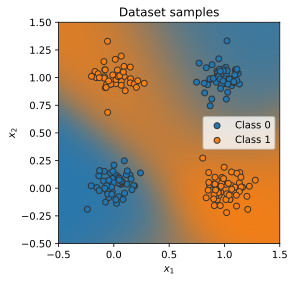

In [31]:
@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = Tensor(to_rgba("C0")).to(device)
    c1 = Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)


visualize_classification(model, dataset.data, dataset.label)
plt.show()

#### 4. Escribe conclusiones sobre c√≥mo te  fue siguiendo el tutorial, qu√© dificultades tuviste y qu√© cosas interesantes encontraste.

Es f√°cil seguir las instrucciones del tutorial, sin embargo faltaban algunas instrucciones y configuraciones para que funcionara correctamente